### Notebook Purpose
*This notebook imports 'CCMF Race Relations Taxonomy' Google Sheet, 'Cleaned Consolidated Data' sheet, and uses available data to add latitude / longitude values of each incident, in order to facilitate mapping / plotting*

In [1]:
import pandas as pd

In [2]:
ccmf = pd.read_csv('E:/Datasets/CCMF Race Relations Taxonomy - Cleaned_Consolidated_Data.csv',
                   index_col = 'incident_id')

In [3]:
ccmf.head(3)

,date,location,category,sub_category,target_community,notes,article_url,year,orig_sheet_name,orig_row_num,Province
incident_id,,,,,,,,,,,
1,2018-01-05,Burnaby,nc,hatespeech,anti-black,B.C. woman caught on video delivering racist r...,https://globalnews.ca/news/3949365/b-c-woman-c...,2018,2018 collection,3,British Columbia
2,2018-01-03,Windsor,nc,vandalism,anti-muslim,Windsor Muslims pen letter asking police why I...,https://www.cbc.ca/news/canada/windsor/graffit...,2018,2018 collection,4,Ontario
3,2018-01-04,Ottawa,nc,hatespeech,anti-indigenous,Sen. Lynn Beyak booted from Conservative caucu...,https://nationalpost.com/news/politics/sen-lyn...,2018,2018 collection,5,Ontario


In [4]:
ccmf['Province'].describe()

count         957
unique         21
top       Ontario
freq          333
Name: Province, dtype: object

In [5]:
ccmf['Province'].value_counts()

Ontario                  333
British Columbia         130
Quebec                   117
Alberta                  113
National                  63
Nova Scotia               58
Manitoba                  46
Saskatchewan              28
Newfoundland Labrador     15
BC                        11
ON                         8
New Brunswick              7
NS                         7
QC                         5
Prince Edward Island       5
MB                         3
Nunavut                    2
AB                         2
Northwest Territories      2
Yukon                      1
SK                         1
Name: Province, dtype: int64

In [6]:
# Set up provinces and territories long and short names to help with data preparation
# notice that Newfoundlance and Labrador has some values as Newfoundland Labrador
prov_long = ['Alberta', 'British Columbia', 'Manitoba', 'New Brunswick', 'Newfoundland and Labrador', 
             'Newfoundland Labrador', 'Nova Scotia', 'Northwest Territories', 'Nunavut', 'Ontario',
             'Prince Edward Island', 'Quebec', 'Saskatchewan', 'Yukon']
prov_short = ['AB', 'BC', 'MB', 'NB', 'NL', 'NL', 'NS', 'NT', 'NU', 'ON', 'PE', 'QC', 'SK', 'YT']

In [7]:
#replace NA values, and `national` values with NA in location column

ccmf['loc_city'] = ['NA' if x in ['national', 'National', 'NA', 'Canada'] else x for x in ccmf['location']]

# if location is a province, then change location city to NA, and have the province value only once

ccmf['loc_city'] = ['NA' if x in prov_long else x for x in ccmf['location']]
ccmf['loc_city'] = ['NA' if x in prov_short else x for x in ccmf['loc_city']]


#make sure that province value is the correct province if location is province not city

ccmf['Province'] = [x if x in prov_long else y for x, y in zip(ccmf['location'], ccmf['Province'])]
ccmf['Province'] = [x if x in prov_short else y for x, y in zip(ccmf['location'], ccmf['Province'])]
#ccmf['location_2'].value_counts()

# change province column to short version of the name to maintain consistency
for x, y in zip(prov_short, prov_long):
    ccmf['Province'] = ccmf['Province'].str.replace(y, x, regex = True)

In [8]:
ccmf.head(3)

,date,location,category,sub_category,target_community,notes,article_url,year,orig_sheet_name,orig_row_num,Province,loc_city
incident_id,,,,,,,,,,,,
1,2018-01-05,Burnaby,nc,hatespeech,anti-black,B.C. woman caught on video delivering racist r...,https://globalnews.ca/news/3949365/b-c-woman-c...,2018,2018 collection,3,BC,Burnaby
2,2018-01-03,Windsor,nc,vandalism,anti-muslim,Windsor Muslims pen letter asking police why I...,https://www.cbc.ca/news/canada/windsor/graffit...,2018,2018 collection,4,ON,Windsor
3,2018-01-04,Ottawa,nc,hatespeech,anti-indigenous,Sen. Lynn Beyak booted from Conservative caucu...,https://nationalpost.com/news/politics/sen-lyn...,2018,2018 collection,5,ON,Ottawa


In [9]:
#replace  NA values, and `national` values with NA in province column
ccmf['loc_province'] = ['Canada' if x in ['NA', 'National'] else (str(x) + ', Canada') for x in ccmf['Province']]
ccmf.head(20)

,date,location,category,sub_category,target_community,notes,article_url,year,orig_sheet_name,orig_row_num,Province,loc_city,loc_province
incident_id,,,,,,,,,,,,,
1,2018-01-05,Burnaby,nc,hatespeech,anti-black,B.C. woman caught on video delivering racist r...,https://globalnews.ca/news/3949365/b-c-woman-c...,2018,2018 collection,3,BC,Burnaby,"BC, Canada"
2,2018-01-03,Windsor,nc,vandalism,anti-muslim,Windsor Muslims pen letter asking police why I...,https://www.cbc.ca/news/canada/windsor/graffit...,2018,2018 collection,4,ON,Windsor,"ON, Canada"
3,2018-01-04,Ottawa,nc,hatespeech,anti-indigenous,Sen. Lynn Beyak booted from Conservative caucu...,https://nationalpost.com/news/politics/sen-lyn...,2018,2018 collection,5,ON,Ottawa,"ON, Canada"
4,2018-01-09,Calgary,nc,hatespeech,anti-black,Lawyers question fairness of Calgary judge acc...,https://www.cbc.ca/news/canada/calgary/judge-e...,2018,2018 collection,6,AB,Calgary,"AB, Canada"
5,2018-01-20,Tignish,nc,harassment,anti-sikh/indian,P.E.I. legion to apologize after video shows w...,http://nationalpost.com/news/canada/p-e-i-legi...,2018,2018 collection,7,PE,Tignish,"PE, Canada"
6,2018-01-16,New Brunswick,nc,racerelations,white supremasists,White nationalist group says more racist poste...,https://www.cbc.ca/news/canada/new-brunswick/u...,2018,2018 collection,8,NB,NA,"NB, Canada"
7,2018-01-13,Toronto,nc,racerelations,anti-semitism,Swastikas drawn on snowy cars in Toronto; poli...,https://www.ctvnews.ca/canada/swastikas-drawn-...,2018,2018 collection,9,ON,Toronto,"ON, Canada"
8,2018-01-15,Nova Scotia,nc,racerelations,anti-indigenous,Petition calls for Acadia prof to be fired for...,http://www.cbc.ca/news/canada/nova-scotia/peti...,2018,2018 collection,10,NS,NA,"NS, Canada"
9,2018-01-12,Toronto,nc,racerelations,white supremasists,Hate rag‚Äô editor promotes Hitler Fan Club in...,https://www.rawstory.com/2018/01/hate-rag-edit...,2018,2018 collection,11,ON,Toronto,"ON, Canada"


In [10]:
#Concatenate loc_city, and loc_province columns to have a complete location value of 
# city, province, Canada | province, Canada, or Canada
ccmf['complete_loc'] = [y if x == 'NA' else (str(x) + ', ' + y) for x, y in zip(ccmf['loc_city'], ccmf['loc_province'])]

In [11]:
ccmf.head(3)

,date,location,category,sub_category,target_community,notes,article_url,year,orig_sheet_name,orig_row_num,Province,loc_city,loc_province,complete_loc
incident_id,,,,,,,,,,,,,,
1,2018-01-05,Burnaby,nc,hatespeech,anti-black,B.C. woman caught on video delivering racist r...,https://globalnews.ca/news/3949365/b-c-woman-c...,2018,2018 collection,3,BC,Burnaby,"BC, Canada","Burnaby, BC, Canada"
2,2018-01-03,Windsor,nc,vandalism,anti-muslim,Windsor Muslims pen letter asking police why I...,https://www.cbc.ca/news/canada/windsor/graffit...,2018,2018 collection,4,ON,Windsor,"ON, Canada","Windsor, ON, Canada"
3,2018-01-04,Ottawa,nc,hatespeech,anti-indigenous,Sen. Lynn Beyak booted from Conservative caucu...,https://nationalpost.com/news/politics/sen-lyn...,2018,2018 collection,5,ON,Ottawa,"ON, Canada","Ottawa, ON, Canada"


In [12]:
from geopy import Nominatim
locator = Nominatim(user_agent='myGeocoder')
from geopy.extra.rate_limiter import RateLimiter

In [13]:
# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)

# 2- - create location column
ccmf['loc'] = ccmf['complete_loc'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
ccmf['point'] = ccmf['loc'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
ccmf[['latitude', 'longitude', 'altitude']] = pd.DataFrame(ccmf['point'].tolist(), index=ccmf.index)

ccmf.head()

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Kamloops, BC, Canada',), **{}).
Traceback (most recent call last):
  File "C:\Users\Moha\Anaconda3\lib\urllib\request.py", line 1317, in do_open
    encode_chunked=req.has_header('Transfer-encoding'))
  File "C:\Users\Moha\Anaconda3\lib\http\client.py", line 1229, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "C:\Users\Moha\Anaconda3\lib\http\client.py", line 1275, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "C:\Users\Moha\Anaconda3\lib\http\client.py", line 1224, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "C:\Users\Moha\Anaconda3\lib\http\client.py", line 1016, in _send_output
    self.send(msg)
  File "C:\Users\Moha\Anaconda3\lib\http\client.py", line 956, in send
    self.connect()
  File "C:\Users\Moha\Anaconda3\lib\http\client.py", line 1392, in connect
    server_hostname=server_hostname)
  File

RateLimiter caught an error, retrying (0/2 tries). Called with (*("St. John's, NL, Canada",), **{}).
Traceback (most recent call last):
  File "C:\Users\Moha\Anaconda3\lib\site-packages\geopy\geocoders\base.py", line 367, in _call_geocoder
    page = requester(req, timeout=timeout, **kwargs)
  File "C:\Users\Moha\Anaconda3\lib\urllib\request.py", line 525, in open
    response = self._open(req, data)
  File "C:\Users\Moha\Anaconda3\lib\urllib\request.py", line 543, in _open
    '_open', req)
  File "C:\Users\Moha\Anaconda3\lib\urllib\request.py", line 503, in _call_chain
    result = func(*args)
  File "C:\Users\Moha\Anaconda3\lib\urllib\request.py", line 1360, in https_open
    context=self._context, check_hostname=self._check_hostname)
  File "C:\Users\Moha\Anaconda3\lib\urllib\request.py", line 1320, in do_open
    r = h.getresponse()
  File "C:\Users\Moha\Anaconda3\lib\http\client.py", line 1321, in getresponse
    response.begin()
  File "C:\Users\Moha\Anaconda3\lib\http\client.py

,date,location,category,sub_category,target_community,notes,article_url,year,orig_sheet_name,orig_row_num,Province,loc_city,loc_province,complete_loc,loc,point,latitude,longitude,altitude
incident_id,,,,,,,,,,,,,,,,,,,
1,2018-01-05,Burnaby,nc,hatespeech,anti-black,B.C. woman caught on video delivering racist r...,https://globalnews.ca/news/3949365/b-c-woman-c...,2018,2018 collection,3,BC,Burnaby,"BC, Canada","Burnaby, BC, Canada","(Burnaby, Metro Vancouver Regional District, B...","(49.2433804, -122.9725459, 0.0)",49.243380,-122.972546,0.0
2,2018-01-03,Windsor,nc,vandalism,anti-muslim,Windsor Muslims pen letter asking police why I...,https://www.cbc.ca/news/canada/windsor/graffit...,2018,2018 collection,4,ON,Windsor,"ON, Canada","Windsor, ON, Canada","(Windsor, Southwestern Ontario, Ontario, N9A 3...","(42.317099, -83.0353434, 0.0)",42.317099,-83.035343,0.0
3,2018-01-04,Ottawa,nc,hatespeech,anti-indigenous,Sen. Lynn Beyak booted from Conservative caucu...,https://nationalpost.com/news/politics/sen-lyn...,2018,2018 collection,5,ON,Ottawa,"ON, Canada","Ottawa, ON, Canada","(Ottawa, Eastern Ontario, Ontario, K1P 1J1, Ca...","(45.421106, -75.690308, 0.0)",45.421106,-75.690308,0.0
4,2018-01-09,Calgary,nc,hatespeech,anti-black,Lawyers question fairness of Calgary judge acc...,https://www.cbc.ca/news/canada/calgary/judge-e...,2018,2018 collection,6,AB,Calgary,"AB, Canada","Calgary, AB, Canada","(Calgary, Alberta, Canada, (51.0534234, -114.0...","(51.0534234, -114.0625892, 0.0)",51.053423,-114.062589,0.0
5,2018-01-20,Tignish,nc,harassment,anti-sikh/indian,P.E.I. legion to apologize after video shows w...,http://nationalpost.com/news/canada/p-e-i-legi...,2018,2018 collection,7,PE,Tignish,"PE, Canada","Tignish, PE, Canada","(Little Tignish River, Prince County, Prince E...","(46.9189808, -64.039147, 0.0)",46.918981,-64.039147,0.0


In [14]:
#After lat and long data are retrieved for each location, count no of locations where no lat-long data was retrieved

print(ccmf['latitude'].isna().sum())
print(ccmf['longitude'].isna().sum())

22
22


In [15]:
#create a new dataframe for locations where no lat-long data was retrieved

ccmf_rev = ccmf[ccmf['latitude'].isna()].copy()
ccmf_rev[['location', 'Province', 'loc_city', 'complete_loc', 'latitude', 'longitude']]

,location,Province,loc_city,complete_loc,latitude,longitude
incident_id,,,,,,
49,Vaughan GTA,BC,Vaughan GTA,"Vaughan GTA, BC, Canada",NaN,NaN
127,Charolettetown,NaN,Charolettetown,"Charolettetown, nan, Canada",NaN,NaN
137,Enerby,BC,Enerby,"Enerby, BC, Canada",NaN,NaN
160,Village of Perdue,SK,Village of Perdue,"Village of Perdue, SK, Canada",NaN,NaN
165,Statford,ON,Statford,"Statford, ON, Canada",NaN,NaN
170,Statford,ON,Statford,"Statford, ON, Canada",NaN,NaN
185,Keeseekoowenin Ojibway First Nation,MB,Keeseekoowenin Ojibway First Nation,"Keeseekoowenin Ojibway First Nation, MB, Canada",NaN,NaN
191,Nova Scotia's Pictou County,NS,Nova Scotia's Pictou County,"Nova Scotia's Pictou County, NS, Canada",NaN,NaN
261,Edmonton/Calgary/Edson/Brooks /Medicine Hat,NaN,Edmonton/Calgary/Edson/Brooks /Medicine Hat,"Edmonton/Calgary/Edson/Brooks /Medicine Hat, n...",NaN,NaN


### Start fixing location data one by one

In [16]:
# incident_id: 49, Vaughan is a city in Ontario, so, province should be changed to ON
ccmf_rev.loc[49,['location']] = 'Vaughan'
ccmf_rev.loc[49,['Province']] = 'ON'

# incident_id: 127, Charlottetown is in Prince Edward Island, correct spelling, and set province to PE
ccmf_rev.loc[127,['location']] = 'Charlottetown'
ccmf_rev.loc[127,['Province']] = 'PE'

#incident_id: 137, city name is Enderby not "Enerby", confirmed from article, correct name
ccmf_rev.loc[137,['location']] = 'Enderby'

#incident_id: 160, just use 'Perdue', and remove 'Village of'
ccmf_rev.loc[160,['location']] = 'Perdue'

#incident_id: 165, 170: city name is Stratford not 'Statford', confirmed from article, correct name
ccmf_rev.loc[[165, 170],['location']] = 'Stratford'
#ccmf_rev.loc[170,['location']] = 'Stratford'

#incident_id: 185 Keeseekoowenin Ojibway First Nation is located near Elphinstone, MB, change location accordingly
ccmf_rev.loc[185,['location']] = 'Elphinstone'

#incident_id: 191, remove Nova Scotia, and keep Pictou County only
ccmf_rev.loc[191,['location']] = 'Pictou County'

#incidents with more than one location such as incidents 261, 320, 815, keep first location only (temporary??)
ccmf_rev.loc[261,['location']] = 'Edmonton'
ccmf_rev.loc[[261, 320, 815],['Province']] = 'AB'

ccmf_rev.loc[320,['location']] = 'Red Deer'
#ccmf_rev.loc[320,['Province']] = 'AB'

ccmf_rev.loc[815,['location']] = 'Calgary'
#ccmf_rev.loc[815,['Province']] = 'AB'

#incident_id: 338, Mount Polley is in BC not QC, confirmed from article, correct province
ccmf_rev.loc[338,['Province']] = 'BC'

#incident_id: 347, city is Saint-Jerome, could have changed due to encoding ??
ccmf_rev.loc[347,['location']] = 'Saint-Jerome'

#incident_id: 426 city is Fredericton ('e' missing), correct accordingly
ccmf_rev.loc[426,['location']] = 'Fredericton'

#incident_id: 538 and 617, correct name is Niagara ('a' missing), (possibly Niagara Falls), correct accordingly
#update province to 'ON'
ccmf_rev.loc[[538, 617],['location']] = 'Niagara'
ccmf_rev.loc[[538, 617],['Province']] = 'ON'

#incident_id: 632, and 636, correct location to 'New Brunswick', (extra 'i'),
ccmf_rev.loc[[632, 636],['location']] = 'New Brunswick'

#incident_id: 744, location is Gaspe Region, could have changed due to encoding ??
ccmf_rev.loc[744,['location']] = 'Gaspe Region'

#incident_id: 753 Haisla Nation is located near Kitamaat, BC, change location accordingly
ccmf_rev.loc[753,['location']] = 'Kitamaat'

#incident_id: 813, and 898, location is Wet’suwet’en, could have changed due to encoding ??
#province is British Columbia, confirmed from articles
ccmf_rev.loc[[813, 898],['location']] = 'Wet’suwet’en'
ccmf_rev.loc[[813, 898],['Province']] = 'BC'

ccmf_rev[['location', 'Province', 'loc_city', 'complete_loc', 'latitude', 'longitude']]

,location,Province,loc_city,complete_loc,latitude,longitude
incident_id,,,,,,
49,Vaughan,ON,Vaughan GTA,"Vaughan GTA, BC, Canada",NaN,NaN
127,Charlottetown,PE,Charolettetown,"Charolettetown, nan, Canada",NaN,NaN
137,Enderby,BC,Enerby,"Enerby, BC, Canada",NaN,NaN
160,Perdue,SK,Village of Perdue,"Village of Perdue, SK, Canada",NaN,NaN
165,Stratford,ON,Statford,"Statford, ON, Canada",NaN,NaN
170,Stratford,ON,Statford,"Statford, ON, Canada",NaN,NaN
185,Elphinstone,MB,Keeseekoowenin Ojibway First Nation,"Keeseekoowenin Ojibway First Nation, MB, Canada",NaN,NaN
191,Pictou County,NS,Nova Scotia's Pictou County,"Nova Scotia's Pictou County, NS, Canada",NaN,NaN
261,Edmonton,AB,Edmonton/Calgary/Edson/Brooks /Medicine Hat,"Edmonton/Calgary/Edson/Brooks /Medicine Hat, n...",NaN,NaN


### Redo same steps as above to prepare data of ccmf_rev dataframe

In [17]:
# if location is a province, then change location city to NA, and have the province value only once

ccmf_rev['loc_city'] = ['NA' if x in prov_long else x for x in ccmf_rev['location']]
ccmf_rev['loc_city'] = ['NA' if x in prov_short else x for x in ccmf_rev['loc_city']]

#replace  NA values, and `national` values with NA in province column
ccmf_rev['loc_province'] = ['Canada' if x == 'NA' else (str(x) + ', Canada') for x in ccmf_rev['Province']]

#Concatenate location 3, and location 4 columns to have a complete location value of
# city, province, Canada | province, Canada, or Canada
ccmf_rev['complete_loc'] = [y if x == 'NA' else (str(x) + ', ' + y) for x, y in zip(ccmf_rev['loc_city'], ccmf_rev['loc_province'])]

ccmf_rev.head(3)

,date,location,category,sub_category,target_community,notes,article_url,year,orig_sheet_name,orig_row_num,Province,loc_city,loc_province,complete_loc,loc,point,latitude,longitude,altitude
incident_id,,,,,,,,,,,,,,,,,,,
49,2018-03-22,Vaughan,police investigation,vandalism,anti-semitism,Police search for suspect after Vaughan synago...,http://www.cbc.ca/news/canada/toronto/rock-sma...,2018,2018 collection,51,ON,Vaughan,"ON, Canada","Vaughan, ON, Canada",None,None,NaN,NaN,NaN
127,2018-07-14,Charlottetown,nc,racerelations,anti-immigration,Flyer attacks immigration from Immigration Wat...,https://www.theguardian.pe.ca/opinion/letter-t...,2018,2018 collection,129,PE,Charlottetown,"PE, Canada","Charlottetown, PE, Canada",None,None,NaN,NaN,NaN
137,2018-07-24,Enderby,bc,racerelations,anti-indigenous,Racist sign posted reading ‚Äústop paying lazy...,https://www.castanet.net/news/Vernon/232184/An...,2018,2018 collection,139,BC,Enderby,"BC, Canada","Enderby, BC, Canada",None,None,NaN,NaN,NaN


In [18]:
# 2- - create location column
ccmf_rev['loc'] = ccmf_rev['complete_loc'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
ccmf_rev['point'] = ccmf_rev['loc'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
ccmf_rev[['latitude', 'longitude', 'altitude']] = pd.DataFrame(ccmf_rev['point'].tolist(), index=ccmf_rev.index)

ccmf_rev[['location', 'Province', 'loc_city', 'complete_loc', 'latitude', 'longitude']]

,location,Province,loc_city,complete_loc,latitude,longitude
incident_id,,,,,,
49,Vaughan,ON,Vaughan,"Vaughan, ON, Canada",43.794154,-79.526802
127,Charlottetown,PE,Charlottetown,"Charlottetown, PE, Canada",46.290678,-63.129478
137,Enderby,BC,Enderby,"Enderby, BC, Canada",50.550479,-119.139779
160,Perdue,SK,Perdue,"Perdue, SK, Canada",52.056154,-107.544795
165,Stratford,ON,Stratford,"Stratford, ON, Canada",43.370090,-80.981802
170,Stratford,ON,Stratford,"Stratford, ON, Canada",43.370090,-80.981802
185,Elphinstone,MB,Elphinstone,"Elphinstone, MB, Canada",50.530346,-100.328254
191,Pictou County,NS,Pictou County,"Pictou County, NS, Canada",45.585537,-62.728322
261,Edmonton,AB,Edmonton,"Edmonton, AB, Canada",53.535411,-113.507996


In [19]:
#Now update original dataframe with corrected value from revised dataframe
ccmf.update(ccmf_rev)
print(ccmf['latitude'].isna().sum())
ccmf[['location', 'Province', 'loc_city', 'complete_loc', 'latitude', 'longitude']][45:55]

0


,location,Province,loc_city,complete_loc,latitude,longitude
incident_id,,,,,,
46,Winnipeg,MB,Winnipeg,"Winnipeg, MB, Canada",49.895537,-97.138458
47,Toronto,ON,Toronto,"Toronto, ON, Canada",43.653482,-79.383935
48,Ottawa,ON,Ottawa,"Ottawa, ON, Canada",45.421106,-75.690308
49,Vaughan,ON,Vaughan,"Vaughan, ON, Canada",43.794154,-79.526802
50,Prince Edward Island,PE,NA,"PE, Canada",46.335551,-63.146668
51,Regina,SK,Regina,"Regina, SK, Canada",50.448760,-104.617310
52,Ottawa,ON,Ottawa,"Ottawa, ON, Canada",45.421106,-75.690308
53,Ottawa,ON,Ottawa,"Ottawa, ON, Canada",45.421106,-75.690308
54,Halifax,NS,Halifax,"Halifax, NS, Canada",44.648618,-63.585949


In [20]:
ccmf = ccmf.drop(['loc', 'point'], axis = 1)

In [21]:
#import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import FastMarkerCluster

In [22]:
map1 = folium.Map(
    location=[47,-73],
    tiles='cartodbpositron',
    zoom_start=1,
)


In [23]:
ccmf.apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]]).add_to(map1), axis=1)
map1

### Maps shoes all values are in Canada, which is a positive initial check

In [24]:
#Compare values of lat - long to values produced by Jeremy
cities = pd.read_csv('E:/Datasets/citiesList.csv')
cities.head()

,name,country.etc,pop,lat,long,capital
0,Abbotsford BC,BC,157795,49.06,-122.30,0
1,Acton ON,ON,8308,43.63,-80.03,0
2,Acton Vale QC,QC,5153,45.63,-72.57,0
3,Airdrie AB,AB,25863,51.30,-114.02,0
4,Aklavik NT,NT,643,68.22,-135.00,0


In [25]:
cities = cities.rename(columns={"name": "city", "country.etc": "province"})
cities.head()

,city,province,pop,lat,long,capital
0,Abbotsford BC,BC,157795,49.06,-122.30,0
1,Acton ON,ON,8308,43.63,-80.03,0
2,Acton Vale QC,QC,5153,45.63,-72.57,0
3,Airdrie AB,AB,25863,51.30,-114.02,0
4,Aklavik NT,NT,643,68.22,-135.00,0


In [26]:
#Remove province notation from city name as province has its own column
cities['city'] = cities['city'].str[:-3]
cities.head()

,city,province,pop,lat,long,capital
0,Abbotsford,BC,157795,49.06,-122.30,0
1,Acton,ON,8308,43.63,-80.03,0
2,Acton Vale,QC,5153,45.63,-72.57,0
3,Airdrie,AB,25863,51.30,-114.02,0
4,Aklavik,NT,643,68.22,-135.00,0


In [27]:
ccmf.drop(['altitude'], inplace = True, axis = 1)

In [28]:
#Capitalize first letter of city column to make sure merging dataframes works without issues
cities['city'] = cities['city'].str.capitalize()
ccmf['loc_city'] = ccmf['loc_city'].str.capitalize()
cities.head()

,city,province,pop,lat,long,capital
0,Abbotsford,BC,157795,49.06,-122.30,0
1,Acton,ON,8308,43.63,-80.03,0
2,Acton vale,QC,5153,45.63,-72.57,0
3,Airdrie,AB,25863,51.30,-114.02,0
4,Aklavik,NT,643,68.22,-135.00,0


In [29]:
#join population, lat, and long data from cities dataframe to ccmf dataframe
ccmf_2 = ccmf.merge(cities, how = 'left', left_on = ['loc_city', 'Province'], right_on = ['city', 'province'])
ccmf_2.head()

,date,location,category,sub_category,target_community,notes,article_url,year,orig_sheet_name,orig_row_num,...,loc_province,complete_loc,latitude,longitude,city,province,pop,lat,long,capital
0,2018-01-05,Burnaby,nc,hatespeech,anti-black,B.C. woman caught on video delivering racist r...,https://globalnews.ca/news/3949365/b-c-woman-c...,2018.0,2018 collection,3.0,...,"BC, Canada","Burnaby, BC, Canada",49.243380,-122.972546,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-03,Windsor,nc,vandalism,anti-muslim,Windsor Muslims pen letter asking police why I...,https://www.cbc.ca/news/canada/windsor/graffit...,2018.0,2018 collection,4.0,...,"ON, Canada","Windsor, ON, Canada",42.317099,-83.035343,Windsor,ON,281545.0,42.30,-83.03,0.0
2,2018-01-04,Ottawa,nc,hatespeech,anti-indigenous,Sen. Lynn Beyak booted from Conservative caucu...,https://nationalpost.com/news/politics/sen-lyn...,2018.0,2018 collection,5.0,...,"ON, Canada","Ottawa, ON, Canada",45.421106,-75.690308,Ottawa,ON,885542.0,45.42,-75.71,1.0
3,2018-01-09,Calgary,nc,hatespeech,anti-black,Lawyers question fairness of Calgary judge acc...,https://www.cbc.ca/news/canada/calgary/judge-e...,2018.0,2018 collection,6.0,...,"AB, Canada","Calgary, AB, Canada",51.053423,-114.062589,Calgary,AB,991432.0,51.05,-114.06,0.0
4,2018-01-20,Tignish,nc,harassment,anti-sikh/indian,P.E.I. legion to apologize after video shows w...,http://nationalpost.com/news/canada/p-e-i-legi...,2018.0,2018 collection,7.0,...,"PE, Canada","Tignish, PE, Canada",46.918981,-64.039147,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
ccmf_2['lat_diff'] = ccmf_2['latitude'] - ccmf_2['lat']
ccmf_2['lat_diff'].describe()

count    636.000000
mean      -0.005264
std        0.023976
min       -0.146106
25%       -0.019128
50%        0.001106
75%        0.003482
max        0.450542
Name: lat_diff, dtype: float64

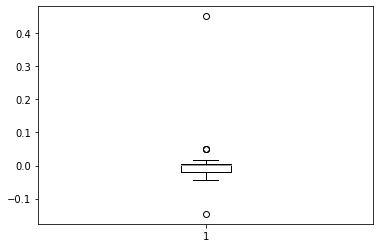

In [31]:
plt.boxplot(ccmf_2['lat_diff'][ccmf_2['lat_diff'].notna()])
plt.show()

In [32]:
(abs(ccmf_2['lat_diff']) > 0.05).value_counts()

False    967
True       5
Name: lat_diff, dtype: int64

In [33]:
ccmf_2['long_diff'] = ccmf_2['longitude'] - ccmf_2['long']
ccmf_2['long_diff'].describe()

count    636.000000
mean       0.005147
std        0.086672
min       -0.726434
25%       -0.003935
50%        0.005047
75%        0.019692
max        1.950212
Name: long_diff, dtype: float64

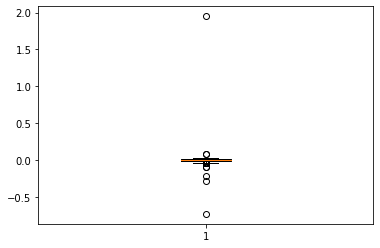

In [34]:
plt.boxplot(ccmf_2['long_diff'][ccmf_2['long_diff'].notna()])
plt.show()

In [35]:
(abs(ccmf_2['long_diff']) > 0.05).value_counts()

False    964
True       8
Name: long_diff, dtype: int64

#### For latitude and longitude values from Geopy and Cities database, differences are minimal except for few values, but there are ~ 300 data points where there are no values in Cities database